In [1]:
import numpy as np

import skfuzzy as fuzz

import matplotlib.pyplot as plt

In [2]:
x_qual = np.arange(0, 11, 1)

x_serv = np.arange(0, 11, 1)

x_tip = np.arange(0, 26, 1)

In [3]:
qual_lo = fuzz.trimf(x_qual, [0, 0, 5])

qual_md = fuzz.trimf(x_qual, [0, 5, 10])

qual_hi = fuzz.trimf(x_qual, [5, 10, 10])

serv_lo = fuzz.trimf(x_serv, [0, 0, 5])

serv_md = fuzz.trimf(x_serv, [0, 5, 10])

serv_hi = fuzz.trimf(x_serv, [5, 10, 10])

tip_lo = fuzz.trimf(x_tip, [0, 0, 13])

tip_md = fuzz.trimf(x_tip, [0, 13, 25])

tip_hi = fuzz.trimf(x_tip, [13, 25, 25])

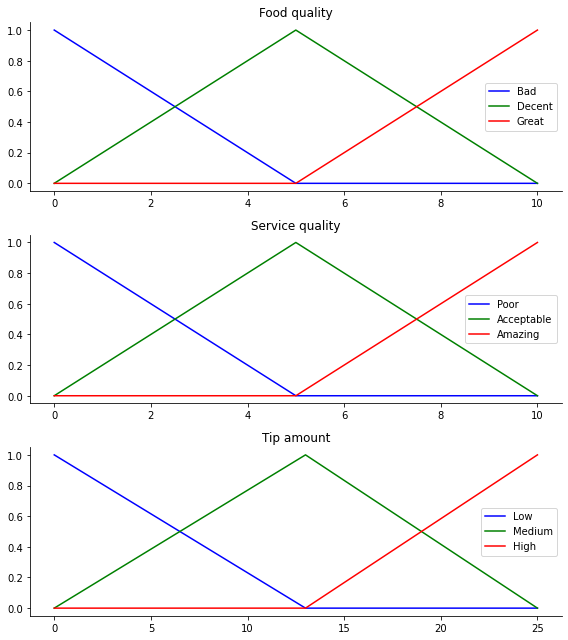

In [4]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x_qual, qual_lo, 'b', linewidth=1.5, label='Bad')

ax0.plot(x_qual, qual_md, 'g', linewidth=1.5, label='Decent')

ax0.plot(x_qual, qual_hi, 'r', linewidth=1.5, label='Great')

ax0.set_title('Food quality')

ax0.legend()

ax1.plot(x_serv, serv_lo, 'b', linewidth=1.5, label='Poor')

ax1.plot(x_serv, serv_md, 'g', linewidth=1.5, label='Acceptable')

ax1.plot(x_serv, serv_hi, 'r', linewidth=1.5, label='Amazing')

ax1.set_title('Service quality')

ax1.legend()

ax2.plot(x_tip, tip_lo, 'b', linewidth=1.5, label='Low')

ax2.plot(x_tip, tip_md, 'g', linewidth=1.5, label='Medium')

ax2.plot(x_tip, tip_hi, 'r', linewidth=1.5, label='High')

ax2.set_title('Tip amount')

ax2.legend()

for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [5]:
qual_level_lo = fuzz.interp_membership(x_qual, qual_lo, 6.5)

qual_level_md = fuzz.interp_membership(x_qual, qual_md, 6.5)

qual_level_hi = fuzz.interp_membership(x_qual, qual_hi, 6.5)

serv_level_lo = fuzz.interp_membership(x_serv, serv_lo, 9.8)

serv_level_md = fuzz.interp_membership(x_serv, serv_md, 9.8)

serv_level_hi = fuzz.interp_membership(x_serv, serv_hi, 9.8)


active_rule1 = np.fmax(qual_level_lo, serv_level_lo)


tip_activation_lo = np.fmin(active_rule1, tip_lo) # removed entirely to 0



tip_activation_md = np.fmin(serv_level_md, tip_md)



active_rule3 = np.fmax(qual_level_hi, serv_level_hi)

tip_activation_hi = np.fmin(active_rule3, tip_hi)

tip0 = np.zeros_like(x_tip)

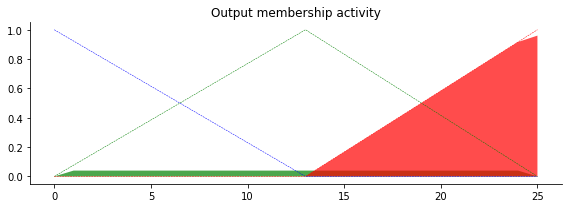

In [6]:
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(x_tip, tip0, tip_activation_lo, facecolor='b', alpha=0.7)

ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--', )

ax0.fill_between(x_tip, tip0, tip_activation_md, facecolor='g', alpha=0.7)

ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')

ax0.fill_between(x_tip, tip0, tip_activation_hi, facecolor='r', alpha=0.7)

ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')

ax0.set_title('Output membership activity')

for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()